In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# seattlecrime6 dataset

In [3]:
data = arff.loadarff('./datasets/Seattle_Crime_Data_06-23-2019-4.arff')
df = pd.DataFrame(data[0])
# print number of rows
print("samples: " + str(df.shape[0]))
# print number of columns
print("features: " + str(df.shape[1]))

# iterate over all columns
for column in df.columns:
    # decode bytes to string for each column
    df[column] = df[column].apply(lambda x: x.decode() if isinstance(x, bytes) else x)


samples: 523590
features: 9


In [4]:
df

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1.975000e+12,900.0,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1.976000e+12,1.0,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,?,?,UNKNOWN
2,1.979000e+12,1600.0,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,1.981000e+13,2029.0,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1.981000e+12,2000.0,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
...,...,...,...,...,...,...,...,...,...
523585,2.019000e+12,1713.0,1713.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,SOUTH,O,O3,MID BEACON HILL
523586,2.019000e+12,730.0,1721.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,EAST,C,C2,MONTLAKE/PORTAGE BAY
523587,2.019000e+12,1724.0,1724.0,ROBBERY-COMMERCIAL,ROBBERY-BUSINESS-BODYFORCE,SOUTH,S,S2,RAINIER BEACH
523588,2.019000e+12,1750.0,1904.0,THEFT-SHOPLIFT,THEFT-SHOPLIFT,NORTH,L,L2,NORTHGATE


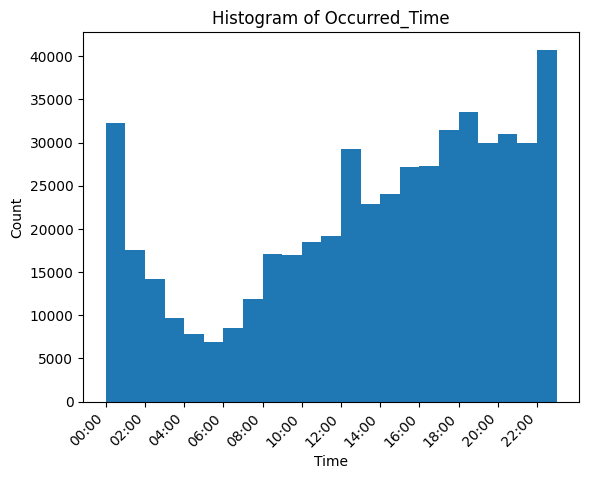

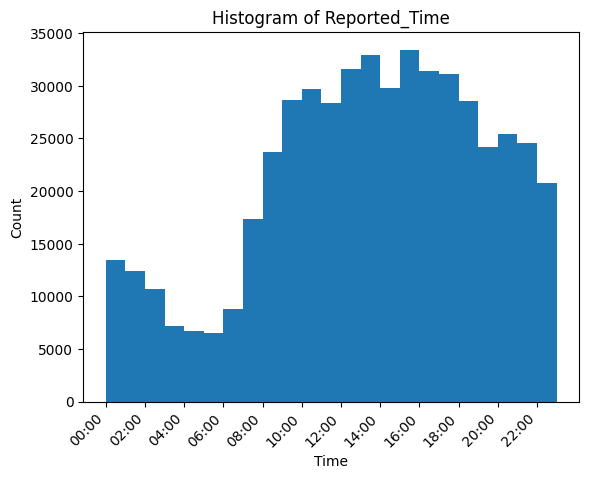

In [15]:
# create a histogram of Occurred_Time

df['Occurred_Time'].plot(kind='hist', bins=range(0, 2400, 100))
plt.title('Histogram of Occurred_Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(range(0, 2400, 200), [f"{hour:02d}:00" for hour in range(0, 24, 2)],rotation=45, ha='right')
# plt.savefig('plots/credit-g/credit_amount.pdf')
plt.show()

# create a histogram of Reported_Time

df['Reported_Time'].plot(kind='hist', bins=range(0, 2400, 100))
plt.title('Histogram of Reported_Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(range(0, 2400, 200), [f"{hour:02d}:00" for hour in range(0, 24, 2)],rotation=45, ha='right')
# plt.savefig('plots/credit-g/credit_amount.pdf')
plt.show()

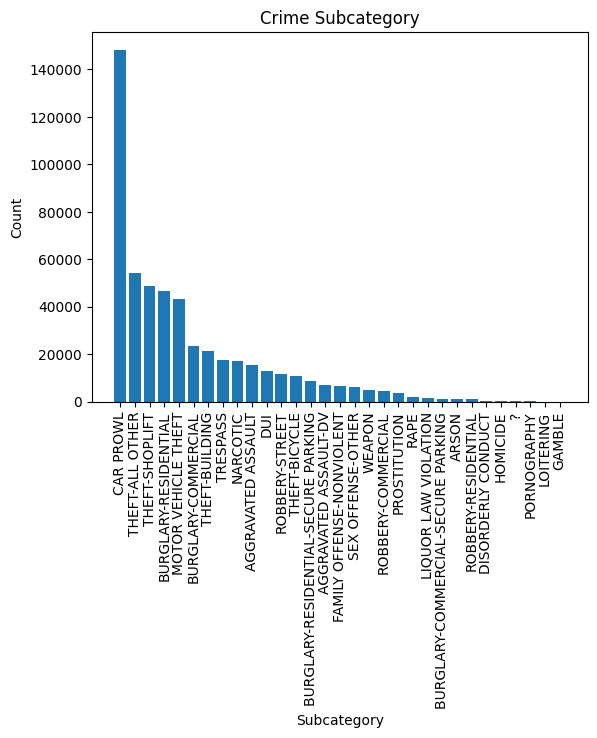

In [35]:
# create a bar chart of Crime_Subcategory

# Set frequency threshold
frequency_threshold = 1

# Calculate frequency of each category
category_counts = df['Crime_Subcategory'].value_counts()

# Filter categories based on frequency threshold
filtered_categories = category_counts[category_counts >= frequency_threshold].index

# Filter the original DataFrame based on filtered categories
filtered_df = df[df['Crime_Subcategory'].isin(filtered_categories)]

category_counts = filtered_df['Crime_Subcategory'].value_counts()
plt.bar(category_counts.index, category_counts)
plt.title('Crime Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=90) # TODO maybe add some kind of labeling
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

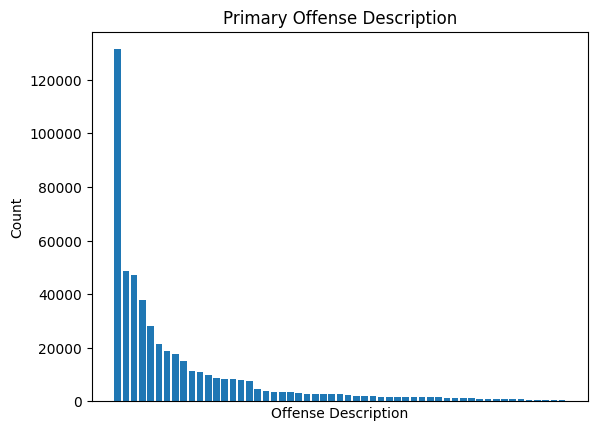

In [30]:
# create a bar chart of Primary_Offense_Description

# Set frequency threshold
frequency_threshold = 500

# Calculate frequency of each category
category_counts = df['Primary_Offense_Description'].value_counts()

# Filter categories based on frequency threshold
filtered_categories = category_counts[category_counts >= frequency_threshold].index

# Filter the original DataFrame based on filtered categories
filtered_df = df[df['Primary_Offense_Description'].isin(filtered_categories)]

category_counts = filtered_df['Primary_Offense_Description'].value_counts()
plt.bar(category_counts.index, category_counts)
plt.title('Primary Offense Description')
plt.xlabel('Offense Description')
plt.ylabel('Count')
plt.xticks([]) # TODO maybe add some kind of labeling
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

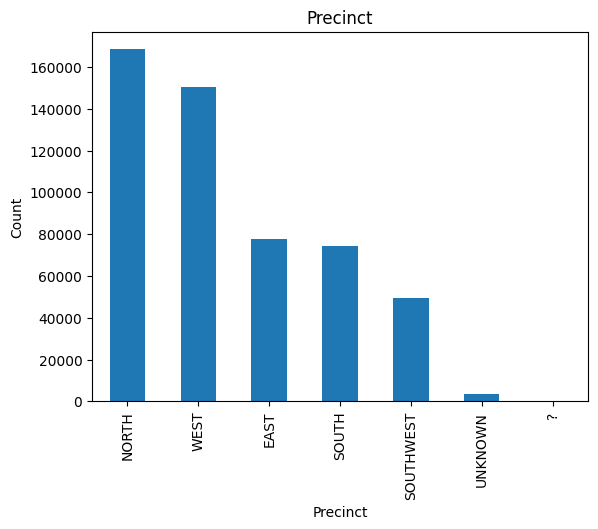

In [36]:
# create a bar chart of purpose
category_counts = df['Precinct'].value_counts()
category_counts.plot(kind='bar')
plt.title('Precinct')
plt.xlabel('Precinct')
plt.ylabel('Count')
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

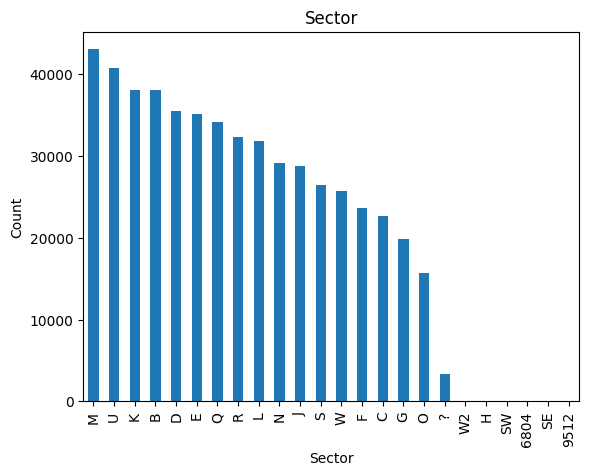

In [37]:
# create a bar chart of Sector
category_counts = df['Sector'].value_counts()
category_counts.plot(kind='bar')
plt.title('Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

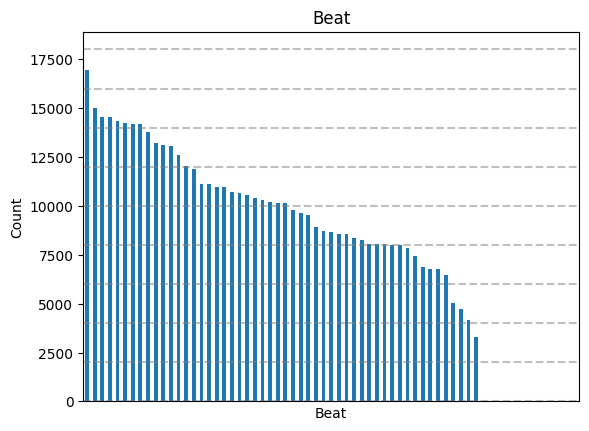

In [44]:
# create a bar chart of Beat
category_counts = df['Beat'].value_counts()
category_counts.plot(kind='bar')
plt.title('Beat')
plt.xlabel('Beat')
plt.ylabel('Count')

# Remove x-axis labels
plt.xticks([]) # TODO maybe add some kind of labeling

# Add dashed lines from y-axis ticks
for tick in plt.gca().get_yticks():
    plt.axhline(y=tick, color='gray', linestyle='--', alpha=0.5)
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

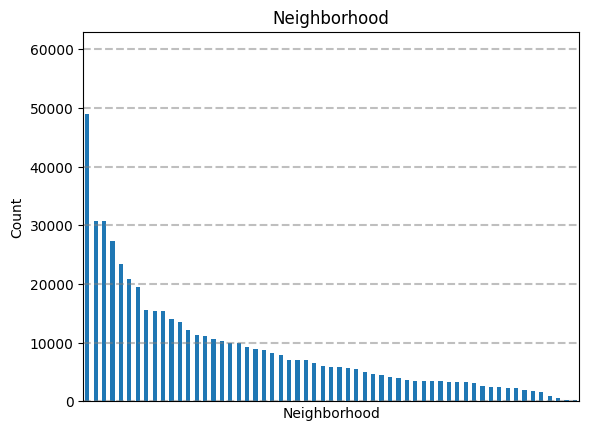

In [43]:
# create a bar chart of Neighborhood
category_counts = df['Neighborhood'].value_counts()
category_counts.plot(kind='bar')
plt.title('Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Remove x-axis labels
plt.xticks([]) # TODO maybe add some kind of labeling

# Add dashed lines from y-axis ticks
for tick in plt.gca().get_yticks():
    plt.axhline(y=tick, color='gray', linestyle='--', alpha=0.5)
    
# plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()